In [71]:
# Enternal library.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
def fix_age(cols):
    #print type(cols)
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [79]:
def format_data(df):
    df.drop(labels=["Name", "Ticket", "Cabin"], axis=1, inplace=True)
    df.Sex.replace(to_replace=["male","female"], value=[1,0], inplace=True)

    # Convert categorical Embarked values into one hot encoding.
    df = df.join(pd.get_dummies(df.Embarked))
    df.drop(labels="Embarked", axis=1, inplace=True)

    # Replace NaNs in Age with mean.
    #df.Age.replace(to_replace=np.nan, value=round(df.Age.mean()), inplace=True)
    df['Age'] = df[['Age', 'Pclass']].apply(fix_age, axis=1)
    
    return df

In [80]:
# Read data
df_train = pd.read_csv("train.csv", index_col=0)
# df_X = df.drop(labels="Survived", axis=1)
# df_X = df_X.astype('float32') # Float32 data type in all the columns.
# df_y = pd.DataFrame(data=df.Survived, columns=["Survived"]) # Int64 datatype in all the columns.
# df_y = df_y.astype('float32')

# X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=100)

**Visualize missing value in the data.**

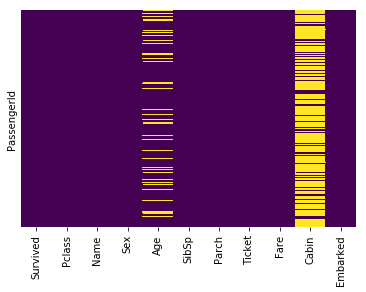

In [81]:
sns.heatmap(df_train.isna(), yticklabels=False, cbar=False, cmap='viridis')

Missing values in age are few and it should be alright if replaced with a suitable value for example mean. However, there are far too many missing values in cabin and hence it should not be used.

**Distribution of age per class**

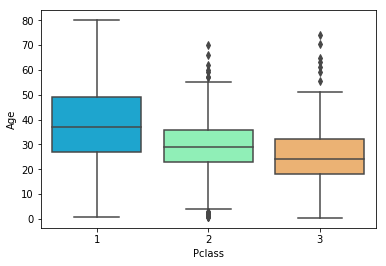

In [82]:
sns.boxplot(x="Pclass", y="Age", data=df_train, palette='rainbow')

It would make sence if we replace missing values in age with the mean value as per the class rather than a single overall mean age. It looks like average age for 1 class is around 37, 2 class is around 29 and 3 class is 24.

In [83]:
df = format_data(df_train)

In [85]:
df[df['Fare'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,,
